<a href="https://colab.research.google.com/github/satwiksps/Deep-Learning/blob/main/03_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn . metrics import mean_squared_error
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
#Boston-House-Price Dataset
from pandas import read_csv
url2 = 'https://raw.githubusercontent.com/erojaso/MLMasteryEndToEnd/master/data/housing.NAN.adjust.csv' #Load CSV using Pandas
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #Define column names
dataframe = read_csv(url2, names=names) #Load CSV using Pandas
array = dataframe.values #Convert to NumPy array
X = array[:,0:13] #Attributes (Split into input rows)
Y = array[:,13] #Labels (Split into output column)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) #Split into train and test sets

In [16]:
scaler = StandardScaler () #Standardize features by removing the mean and scaling to unit variance
X_train = scaler . fit_transform ( X_train )
X_test = scaler . transform ( X_test ) #Apply standardization to test data

In [17]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First layer: Dense layer with 16 neurons, ReLU activation, and input shape defined by the number of features in X_train
    Dense(32, activation='relu'),  # Second layer: Dense layer with 8 neurons and ReLU activation
    Dense(1)  # Output layer: Dense layer with 1 neuron
])

# Line 3: Compiling the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer
    loss='mse',  # Loss function: Mean Squared Error
    metrics=['mse']  # Metrics: Mean Squared Error
)

# Line 4: Training the model
history = model.fit(
    X_train,  # Training data features
    Y_train,  # Training data labels
    epochs=50,  # Number of epochs (iterations over the entire dataset)
    validation_split=0.2,  # Fraction of training data to be used as validation data
    batch_size=10  # Number of samples per gradient update
)

Epoch 1/50
28/28 [==============================] - 1s 8ms/step - loss: 582.4040 - mse: 582.4040 - val_loss: 562.4935 - val_mse: 562.4935
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 517.0547 - mse: 517.0547 - val_loss: 468.5638 - val_mse: 468.5638
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 401.6582 - mse: 401.6582 - val_loss: 305.3565 - val_mse: 305.3565
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 230.7535 - mse: 230.7535 - val_loss: 119.5577 - val_mse: 119.5577
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 98.3196 - mse: 98.3196 - val_loss: 44.7742 - val_mse: 44.7742
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 48.8241 - mse: 48.8241 - val_loss: 29.4696 - val_mse: 29.4696
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 34.0890 - mse: 34.0890 - val_loss: 21.3850 - val_mse: 21.3850
Epoch 8/50
28/28 [============================

6/6 [==============================] - 0s 2ms/step
MSE: 18.776089782830372


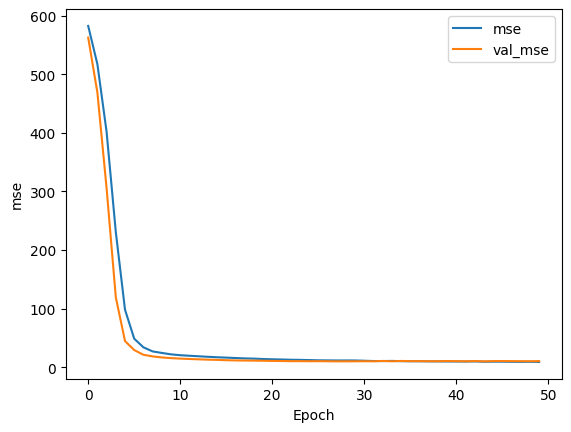

In [18]:
# Evaluate on test data
Y_pred=model.predict( X_test )

# Performance analysis
print('MSE:', mean_squared_error(Y_test, Y_pred))

# Plot training history
plt.plot(history.history['mse'], label='mse') #Plots the training accuracy over epochs
plt.plot(history.history['val_mse'], label='val_mse') #Plots the validation accuracy over epochs.
plt.xlabel('Epoch') #Sets the label for the x-axis to 'Epoch'.
plt.ylabel('mse') #Sets the label for the y-axis to 'Accuracy'.
plt.legend(loc='upper right') #Adds a legend to the plot, positioned at the lower right.
plt.show() #Displays the plot.